# import

In [1]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

import math

import matplotlib.pyplot as plt

from scipy.spatial import distance

mbyte = 1048576
norm_l1 = Normalizer(norm='l1')
norm_l2 = Normalizer(norm='l2')

# Tools

In [4]:
from hashlib import md5

def generate_md5(H):
    hmd5 = md5()
    hmd5.update(str(H).encode(encoding='utf-8'))
    return hmd5.hexdigest()

# Datasets

- SIFT
- MNIST
- GLOVE

In [5]:
%store -r Datasets

In [6]:
Datasets.keys()

dict_keys(['SIFT-10K'])

In [7]:
data = Datasets['SIFT-10K']
data.keys()

dict_keys(['title', 'train', 'test', 'K', 'n_train', 'n_test', 'k_near_neighbors', 'nearest_neighbor'])

In [8]:
train = data['train']
test = data['test']
K = data['K']
d = train.shape[1]
k_near_neighbors = data['k_near_neighbors']

In [9]:
train[:10]

array([[ 0, 16, 35, ..., 25, 23,  1],
       [14, 35, 19, ..., 11, 21, 33],
       [ 0,  1,  5, ...,  4, 23, 10],
       ...,
       [16, 36, 10, ...,  3,  7, 41],
       [ 8, 35, 11, ..., 17,  4,  7],
       [21, 13, 18, ..., 51, 36,  3]])

# Metrics

In [10]:
def metrics(P, query_func, args, test, exact_near_neighbors):
    """
    
    """
    pass

# Desc

In [11]:
rand = np.random.RandomState(1)

## Step 1: center the mean

In [12]:
center = train.mean(axis=0)
center.shape

(128,)

In [13]:
train

array([[ 0, 16, 35, ..., 25, 23,  1],
       [14, 35, 19, ..., 11, 21, 33],
       [ 0,  1,  5, ...,  4, 23, 10],
       ...,
       [48,  1,  0, ..., 22, 62, 18],
       [ 0,  0,  0, ...,  3,  3, 11],
       [14,  2,  0, ...,  0,  0,  7]])

In [14]:
center

array([29.0548, 16.7855, 10.7083,  9.7645, 11.3086, 13.3   , 15.2883,
       17.6192, 32.8404, 31.0095, 35.9102, 21.5091, 16.0053, 28.0939,
       32.1253, 22.924 , 36.2481, 22.5343, 36.4205, 29.1865, 16.4631,
       19.8998, 30.5308, 34.2486, 27.0141, 15.5669, 17.0846, 17.1971,
       14.266 ,  9.9115,  9.4123, 17.4541, 56.8769, 24.6039, 13.7209,
       16.6006, 22.0627, 27.7478, 24.7289, 27.4496, 61.2528, 41.6972,
       36.5536, 23.1854, 23.0752, 37.3428, 35.1334, 30.1793, 58.9462,
       25.0348, 40.7383, 40.7892, 26.5005, 23.0211, 29.471 , 45.475 ,
       51.7583, 20.6621, 24.3619, 31.923 , 30.0682, 20.0752, 14.3279,
       28.1643, 56.2298, 20.611 , 23.8963, 26.3485, 22.6032, 18.0076,
       14.5954, 29.842 , 62.9647, 24.6328, 35.617 , 34.4567, 22.7886,
       23.7647, 33.1924, 49.4097, 57.7928, 37.629 , 32.4096, 22.2239,
       26.9073, 43.5585, 39.6792, 29.811 , 52.7833, 23.4802, 14.2668,
       19.1766, 28.8002, 32.9715, 25.8216, 26.5538, 28.622 , 15.4585,
       16.7753, 14.2

In [15]:
train_center = train - center
test_center = test - center

**计算 $k = 200$**

In [16]:
%%time
K = 200
k_near_neighbors = []
for i, q in enumerate(test_center):
    dis = np.array([distance.euclidean(q, p) for p in train_center])
    order_dis = dis.argsort()
    k_near_neighbors.append(order_dis[:K])

CPU times: user 26.7 s, sys: 23 ms, total: 26.7 s
Wall time: 26.9 s


## Step 2: 50 PNs $\rightarrow$ 2000 KCs

In [17]:
k = 10

In [18]:
m = 10 * d

**m * d**
$$
M_{ji} = 
\begin{cases}
1, & \text{if $x_i$ connects to $y_i$} \\
0, & \text{otherwise}
\end{cases}
$$

$$
x = (x_1, ..., x_d) \in \mathbb R^d \\
y = (y_1, ..., y_m) \in \mathbb R^m \\
d << m
$$

$$
y = Mx
$$

**for discretization**
$$
y = \lfloor\frac{Mx}{w}\rfloor
$$

In [19]:
%%time
M = rand.choice([0, 1], p=[1-k/d, k/d], size=(m, d))
M.shape

CPU times: user 5.3 ms, sys: 3.26 ms, total: 8.57 ms
Wall time: 9.98 ms


In [20]:
%%time
H = train_center.dot(M.T)

CPU times: user 210 ms, sys: 82.8 ms, total: 293 ms
Wall time: 282 ms


In [21]:
train_center.sum()

-1.798980520106852e-09

In [22]:
H.sum()

-3.311361069791019e-07

## Step 3: Winner-Take-All

- **winner-take-all**

取 2000 个中 $k$ highest

$$
z_i = 
\begin{cases}
y_i, & \text{if $y_i$ is one of the $k$ largest entries in $y$} \\
0, & \text{otherwise}
\end{cases}
$$

each entry $M_{ij}$ is set independently with probability $p$, $p = \frac{6}{d}$

# Condition (Args)

- 10000 points, 1000 random query input from it.
- metric: precision, 2%(200)

In [23]:
n, d = train_center.shape

In [24]:
s_arr = np.floor(np.array([0.01, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5]) * d).astype(np.int)
s_arr

array([ 1,  3,  6,  8, 12, 25, 38, 51, 64])

In [25]:
m_arr_with_d = np.arange(2, 32, 2) * d
m_arr_with_d

array([ 256,  512,  768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816,
       3072, 3328, 3584, 3840])

In [26]:
m_arr = np.arange(100, 5300, 300)

In [27]:
k_arr = np.arange(2, int(d / 2 + 2), 2)
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

# Sparse binary vs. dense Gaussian random projections

## E2LSH

In [28]:
w = 500
k = 12

In [29]:
A = rand.normal(0, 1, (k, d))
B = rand.uniform(0, w, (k))

In [30]:
(train_center.dot(A.T) + B) // w

array([[ 1.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0., -1.,  0., ..., -1.,  0.,  0.],
       [ 1., -1.,  0., ..., -1.,  1.,  0.],
       ...,
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0., -1., -1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [31]:
e2lsh_H = (train_center.dot(A.T) + B) // w

In [32]:
%%time

e2lsh_precision = []

for i, q in enumerate(test_center):
    h = (q.dot(A.T) + B) // w
    dis = np.array([distance.euclidean(h, p_h) for p_h in e2lsh_H])
    correct = len(np.intersect1d(dis.argsort()[:K], k_near_neighbors[i]))
    e2lsh_precision.append(correct / K)

print(np.array(e2lsh_precision).mean())

0.19770000000000004
CPU times: user 22.4 s, sys: 9.51 ms, total: 22.4 s
Wall time: 22.5 s


# FLY

## metrics

In [33]:
def test_precision(train, test, s, m, k=4, near_neighbors=None, K=200, 
                   use_wta=False, use_indices=False, use_variance=False,
                   random_state=None, verbose=False):
    """
    Args:
        s: number of select ...  10%
        m: number of Kenyon Cells  20*k, 10*d
        k: Top k (winner take all)
        near_neighbors
        K: k near neighbors
        use_wta: winner take all
        use_indices: top k = 1, else = 0
        use_variance
        random_state
        verbose
    """
    if random_state is None:
        rand = np.random.RandomState()
    else:
        rand = np.random.RandomState(random_state)

    
    n, d = train.shape
    
    if use_variance is True:
        variance = train.var(axis=0)
        # idxs = rand.choice(np.arange(d), p=variance / variance.sum(), size=(m, s))
        idxs = np.array([rand.choice(np.arange(d), p=variance/variance.sum(), size=s, replace=False) 
                         for i in range(m)])
        M = np.zeros((m, d))
        for i in range(m):
            M[i][idxs[i]] = 1
    else:
        M = rand.choice([0, 1], p=[1-s/d, s/d], size=(m, d))
    
    H = train.dot(M.T)
    
    if use_wta is True:
        H_order = H.argsort(axis=1)
        for i, h in enumerate(H_order[:, :-k]):
            H[i][h] = 0
            if use_indices is True:
                H[i][H[i] != 0] = 1
    
    precision = []
    for i, q in enumerate(test):
        h = M.dot(q)
        
        if use_wta is True:
            h[h.argsort()[:-k]] = 0
        
            if use_indices is True:
                h[h != 0] = 1

        dis = np.array([distance.euclidean(h, h_) for h_ in H])
        precision.append(len(np.intersect1d(dis.argsort()[:K], near_neighbors[i])) / K)
    
    result = np.array(precision).mean()

    if verbose is True:
        print('s = {}, m = {}, k = {}, preicison = {}'.format(s, m, k, result))
        
    return result

In [34]:
test_precision(train_center, test_center, s=4, m=2000, k=4, near_neighbors=k_near_neighbors, random_state=1)

0.8751000000000001

In [35]:
test_precision(train_center, test_center, s=4, m=2000, k=4, near_neighbors=k_near_neighbors, use_variance=True, random_state=1)

0.8066000000000002

## test: sparse binary

$$
m = 
\begin{cases}
10 \times d \\
20 \times k
\end{cases}
$$

### s

#### fixed $m = 10 \times d$

In [36]:
s_arr

array([ 1,  3,  6,  8, 12, 25, 38, 51, 64])

In [37]:
%%time
m = 10 * d
precision_s_with_m_10d = []
for s in s_arr:
    precision_s_with_m_10d.append(test_precision(train_center, test_center, 
                                    s, m,
                                    near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 7min 16s, sys: 17.4 s, total: 7min 33s
Wall time: 4min 48s


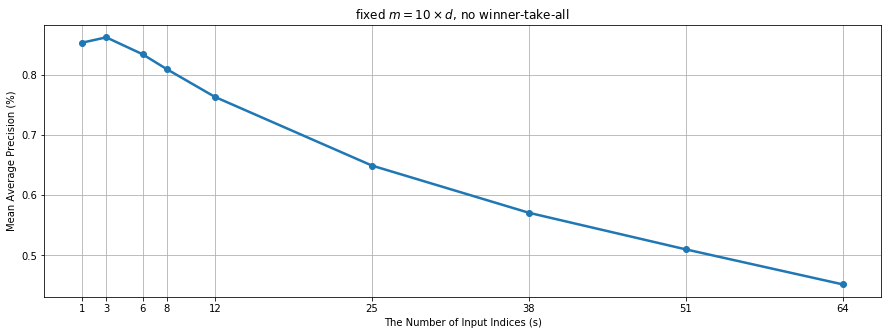

In [38]:
plt.figure(figsize=(15, 5))
plt.plot(s_arr, precision_s_with_m_10d, 'o-', linewidth=2.5)
plt.xticks(s_arr)
plt.grid()
plt.title('fixed $m = 10 \\times d$, no winner-take-all')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.show()

####  fixed $m = 20 \times k, k = 4$

In [39]:
k = 4
m = 20 * k

In [40]:
%%time
precision_s_with_m_20k = []
for s in s_arr:
    precision_s_with_m_20k.append(test_precision(train_center, test_center, 
                                        s, m, k,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 6min 17s, sys: 17.5 s, total: 6min 35s
Wall time: 3min 42s


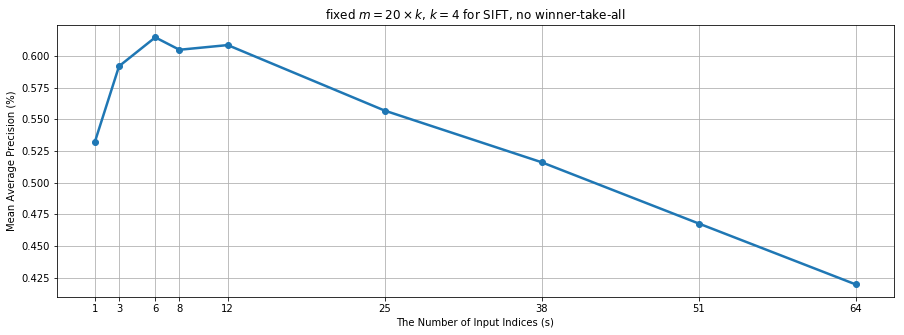

In [41]:
plt.figure(figsize=(15, 5))
plt.plot(s_arr, precision_s_with_m_20k, 'o-', linewidth=2.5)
plt.xticks(s_arr)
plt.grid()
plt.title('fixed $m = 20 \\times k$, $k = 4$ for SIFT, no winner-take-all')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.show()

### m

#### fixed $s = 12$, $m$ from $10$ to $30 \times d$, $k = 4$

In [42]:
s = 12

In [43]:
%%time
precision_m_d_with_s12 = []
for m in m_arr_with_d:
    precision_m_d_with_s12.append(test_precision(train_center, test_center, 
                                        s, m,
                                        near_neighbors=k_near_neighbors, random_state=2))

CPU times: user 12min 35s, sys: 29.7 s, total: 13min 4s
Wall time: 8min 26s


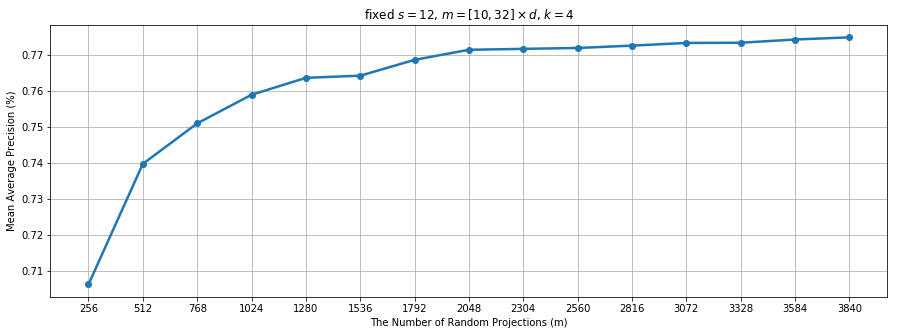

In [44]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr_with_d, precision_m_d_with_s12, 'o-', linewidth=2.5)
plt.xticks(m_arr_with_d)
plt.grid()
plt.title('fixed $s = 12$, $m = [10, 32] \\times d$, $k = 4$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.show()

#### fixed $s = 12$, $m$ from $2$ to $30 \times k$, $k = 4$

In [45]:
s = 12
k = 4
m_arr_with_k4 = np.arange(2, 32, 2) * k

In [46]:
%%time
precision_m_k_with_s12_k4 = []
for m in m_arr_with_k4:
    precision_m_k_with_s12_k4.append(test_precision(train_center, test_center, 
                                        s, m, k,
                                        near_neighbors=k_near_neighbors, random_state=2))

CPU times: user 9min 40s, sys: 22.5 s, total: 10min 2s
Wall time: 6min 19s


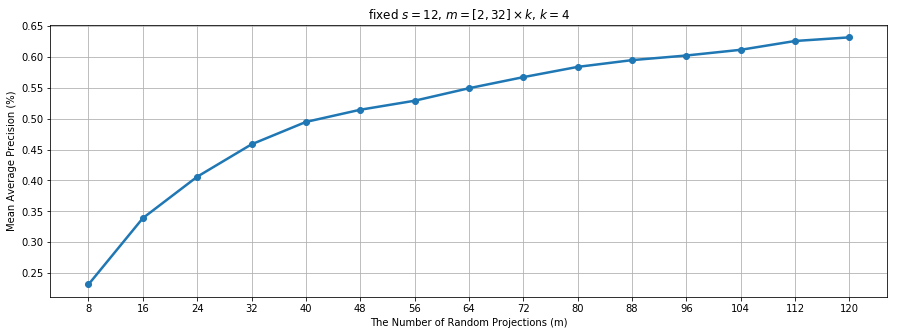

In [47]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr_with_k4, precision_m_k_with_s12_k4, 'o-', linewidth=2.5)
plt.xticks(m_arr_with_k4)
plt.grid()
plt.title('fixed $s = 12$, $m = [2, 32] \\times k$, $k = 4$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.show()

#### fixed $s = 12$, $m$ from $100$ to $5000$, $k = 4$

In [48]:
s = 12
m_arr

array([ 100,  400,  700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3100,
       3400, 3700, 4000, 4300, 4600, 4900, 5200])

In [49]:
%%time
precision_m_with_s12 = []
for m in m_arr:
    precision_m_with_s12.append(test_precision(train_center, test_center, 
                                        s, m,
                                        near_neighbors=k_near_neighbors, random_state=2))

CPU times: user 15min 45s, sys: 35.6 s, total: 16min 21s
Wall time: 10min 46s


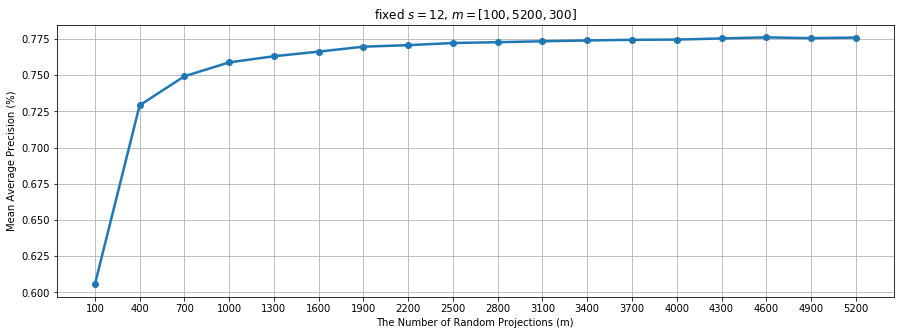

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr, precision_m_with_s12, 'o-', linewidth=2.5)
plt.xticks(m_arr)
plt.grid()
plt.title('fixed $s = 12$, $m = [100, 5200, 300]$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.show()

#### fixed $s = 4$, $m$ from $100$ to $5000$, $k = 4$

In [51]:
s = 4
m_arr

array([ 100,  400,  700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3100,
       3400, 3700, 4000, 4300, 4600, 4900, 5200])

In [52]:
%%time
precision_m_with_s4 = []
for m in m_arr:
    precision_m_with_s4.append(test_precision(train_center, test_center, 
                                        s, m,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 15min 57s, sys: 35.4 s, total: 16min 32s
Wall time: 11min 25s


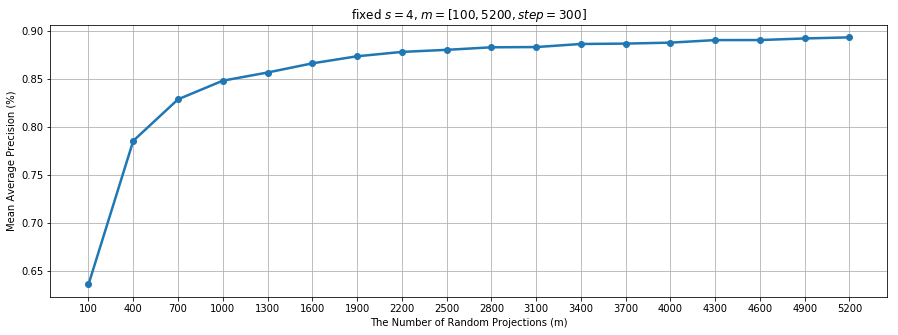

In [53]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr, precision_m_with_s4, 'o-', linewidth=2.5, label='s=4')
plt.xticks(m_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = [100, 5200, step=300]$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.show()

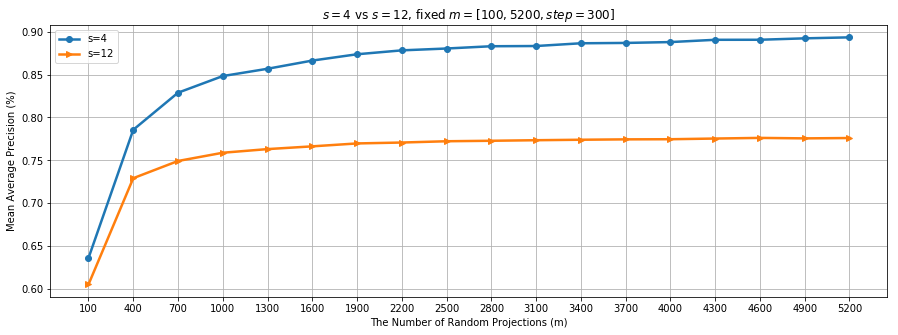

In [54]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr, precision_m_with_s4, 'o-', linewidth=2.5, label='s=4')
plt.plot(m_arr, precision_m_with_s12, '>-', linewidth=2.5, label='s=12')
plt.xticks(m_arr)
plt.grid()
plt.title('$s = 4$ vs $s = 12$, fixed $m = [100, 5200, step=300]$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

---

## test: winner-take-all  (no indices)

**when**
$$
z_i = 
\begin{cases}
y_i, & \text{if $y_i$ is one of the $k$ largest entries in $y$} \\
0, & \text{otherwise}
\end{cases}
$$

### s

#### fixed $m = 10 \times d$

In [55]:
s_arr

array([ 1,  3,  6,  8, 12, 25, 38, 51, 64])

In [56]:
%%time
m = 10 * d
precision_wta_s_with_m10d = []
for s in s_arr:
    precision_wta_s_with_m10d.append(test_precision(train_center, test_center, 
                                        s, m, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 7min 19s, sys: 18.6 s, total: 7min 37s
Wall time: 4min 50s


**s = [1,64], m = 10 $\times$ d, k = 4**

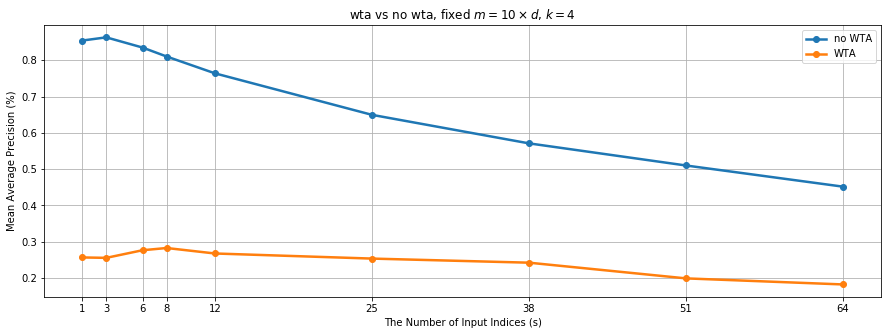

In [57]:
plt.figure(figsize=(15, 5))
plt.plot(s_arr, precision_s_with_m_10d,  'o-', linewidth=2.5, label='no WTA')
plt.plot(s_arr, precision_wta_s_with_m10d, 'o-', linewidth=2.5, label='WTA')
plt.xticks(s_arr)
plt.grid()
plt.title('wta vs no wta, fixed $m = 10 \\times d$, $k=4$')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

####  fixed $m = 20 \times k, k = 4$

In [58]:
k = 4
m = 20 * k

In [59]:
%%time
precision_wta_s_with_m20k_k4 = []
for s in s_arr:
    precision_wta_s_with_m20k_k4.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=2))

CPU times: user 6min 28s, sys: 15.2 s, total: 6min 43s
Wall time: 4min 23s


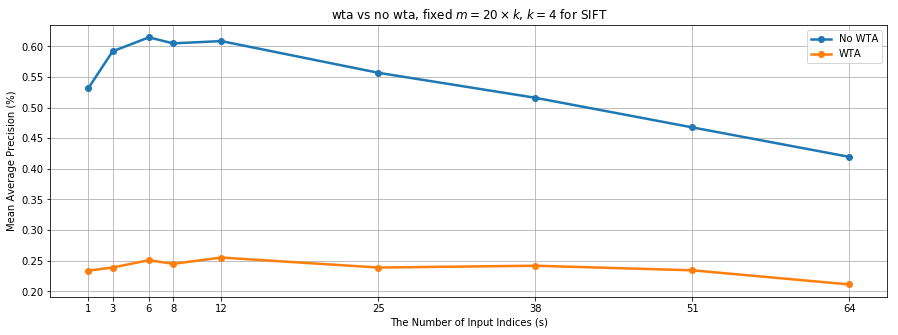

In [60]:
plt.figure(figsize=(15, 5))
plt.plot(s_arr, precision_s_with_m_20k, 'o-', linewidth=2.5, label='No WTA')
plt.plot(s_arr, precision_wta_s_with_m20k_k4, 'o-', linewidth=2.5, label='WTA')
plt.xticks(s_arr)
plt.grid()
plt.title('wta vs no wta, fixed $m = 20 \\times k$, $k = 4$ for SIFT')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

### m

#### fixed $s = 12$, $m$ from $10$ to $30 \times d$, $k = 4$

In [61]:
s = 12
k = 4
m_arr_with_d

array([ 256,  512,  768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816,
       3072, 3328, 3584, 3840])

In [62]:
%%time
precision_m_d_with_s12_wta = []
for m in m_arr_with_d:
    precision_m_d_with_s12_wta.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=2))

CPU times: user 13min 5s, sys: 26.8 s, total: 13min 32s
Wall time: 10min


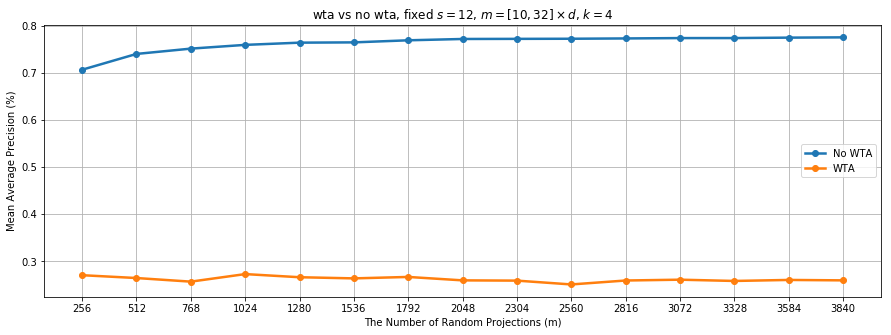

In [63]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr_with_d, precision_m_d_with_s12, 'o-', linewidth=2.5, label='No WTA')
plt.plot(m_arr_with_d, precision_m_d_with_s12_wta, 'o-', linewidth=2.5, label='WTA')
plt.xticks(m_arr_with_d)
plt.grid()
plt.title('wta vs no wta, fixed $s = 12$, $m = [10, 32] \\times d$, $k = 4$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

#### fixed $s = 12$, $m$ from $2$ to $30 \times k$, $k = 4$

In [64]:
s = 12
k = 4

In [65]:
%%time
precision_m_k_with_s12_k4_wta = []
for m in m_arr_with_k4:
    precision_m_k_with_s12_k4_wta.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 9min 10s, sys: 22.7 s, total: 9min 32s
Wall time: 5min 44s


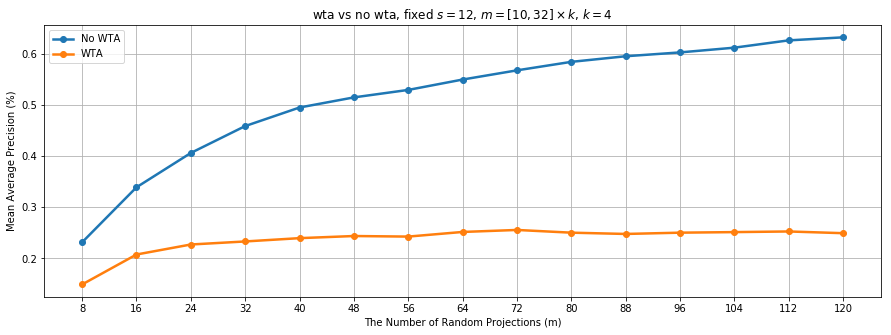

In [66]:
plt.figure(figsize=(15, 5))

plt.plot(m_arr_with_k4, precision_m_k_with_s12_k4, 'o-', linewidth=2.5, label='No WTA')
plt.plot(m_arr_with_k4, precision_m_k_with_s12_k4_wta, 'o-', linewidth=2.5, label='WTA')
plt.xticks(m_arr_with_k4)
plt.grid()
plt.title('wta vs no wta, fixed $s = 12$, $m = [10, 32] \\times k$, $k = 4$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

#### fixed $s = 12$, $m$ from $100$ to $5000$, $k = 4$

In [67]:
s = 12
k = 4
m_arr

array([ 100,  400,  700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3100,
       3400, 3700, 4000, 4300, 4600, 4900, 5200])

In [68]:
%%time
precision_m_with_s12_wta = []
for m in m_arr:
    precision_m_with_s12_wta.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 15min 4s, sys: 39.4 s, total: 15min 44s
Wall time: 9min 42s


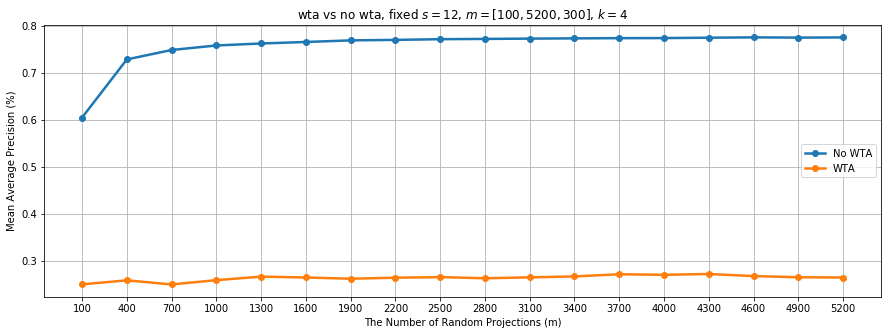

In [69]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr, precision_m_with_s12, 'o-', linewidth=2.5, label='No WTA')
plt.plot(m_arr, precision_m_with_s12_wta, 'o-', linewidth=2.5, label='WTA')
plt.xticks(m_arr)
plt.grid()
plt.title('wta vs no wta, fixed $s = 12$, $m = [100, 5200, 300]$, $k = 4$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

#### fixed $s = 4$, $m$ from $100$ to $5000$, $k = 4$

In [70]:
s = 4
k = 4

In [71]:
%%time
precision_m_with_s4_wta = []
for m in m_arr:
    precision_m_with_s4_wta.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 15min 48s, sys: 38.2 s, total: 16min 26s
Wall time: 10min 46s


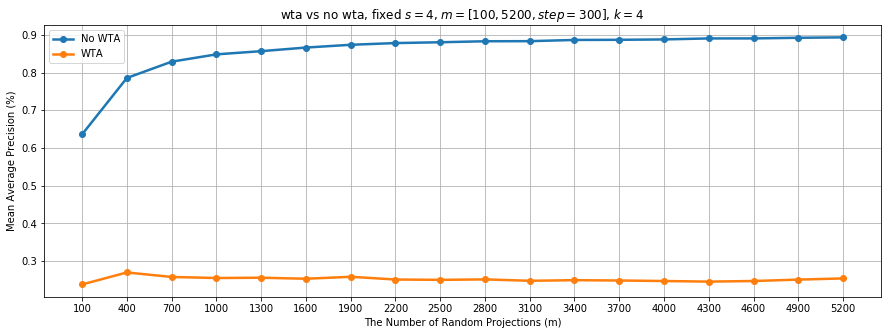

In [72]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr, precision_m_with_s4, 'o-', linewidth=2.5, label='No WTA')
plt.plot(m_arr, precision_m_with_s4_wta, 'o-', linewidth=2.5, label='WTA')

plt.xticks(m_arr)
plt.grid()
plt.title('wta vs no wta, fixed $s = 4$, $m = [100, 5200, step=300]$, $k = 4$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

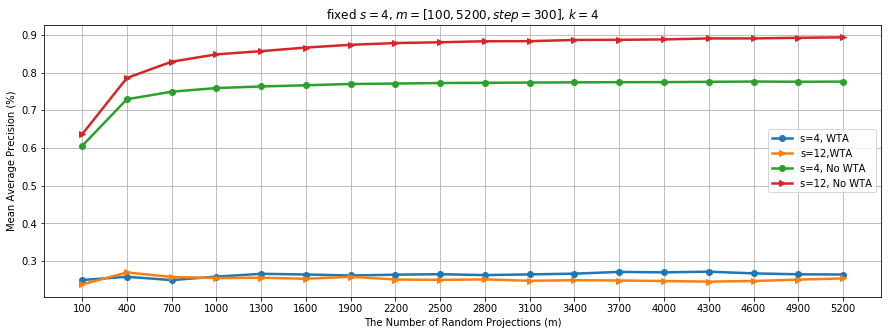

In [73]:
plt.figure(figsize=(15, 5))
plt.plot(m_arr, precision_m_with_s12_wta, 'o-', linewidth=2.5, label='s=4, WTA')
plt.plot(m_arr, precision_m_with_s4_wta, '>-', linewidth=2.5, label='s=12,WTA')
plt.plot(m_arr, precision_m_with_s12, 'o-', linewidth=2.5, label='s=4, No WTA')
plt.plot(m_arr, precision_m_with_s4, '>-', linewidth=2.5, label='s=12, No WTA')

plt.xticks(m_arr)
plt.grid()

plt.title('fixed $s = 4$, $m = [100, 5200, step=300]$, $k = 4$')
plt.xlabel('The Number of Random Projections (m)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

### k

#### fixed $s = 4$, $m = 20 \times k$, $k$ from $2$ to $64$

In [74]:
s = 4
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

In [75]:
%%time
precision_k_with_s4_m20k = []
for k in k_arr:
    m = 20 * k
    precision_k_with_s4_m20k.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 23min 11s, sys: 1min 3s, total: 24min 14s
Wall time: 14min 3s


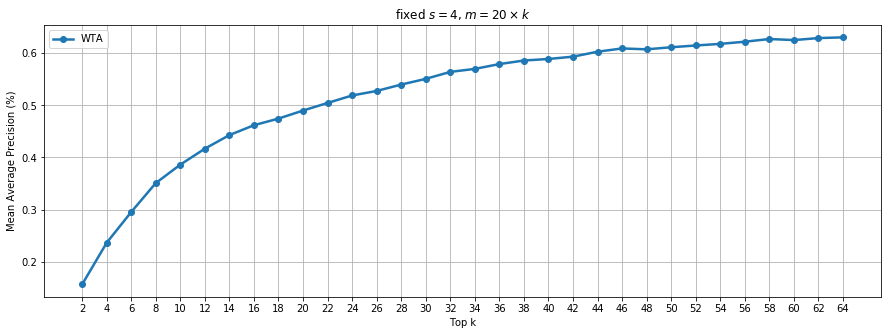

In [76]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m20k, 'o-', linewidth=2.5, label='WTA')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 20 \\times k$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

#### fixed $s=4$, $m = 10 \times d$, $k$ from $2$ to $64$

In [77]:
s = 4
m = 10 * d
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

In [78]:
%%time
precision_k_with_s4_m10d = []
for k in k_arr:
    precision_k_with_s4_m10d.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 25min 31s, sys: 1min, total: 26min 31s
Wall time: 17min 7s


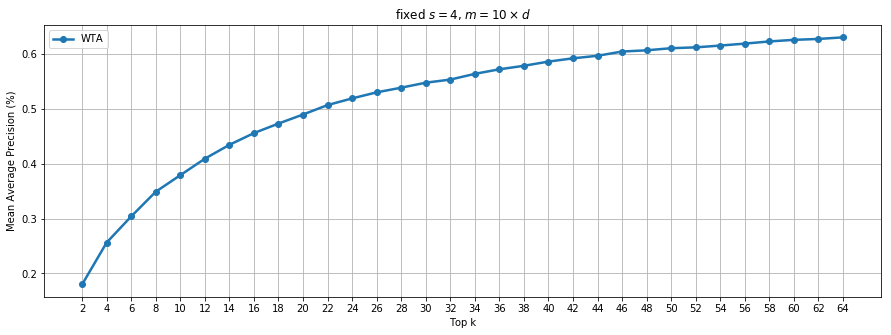

In [79]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='WTA')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 10 \\times d$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

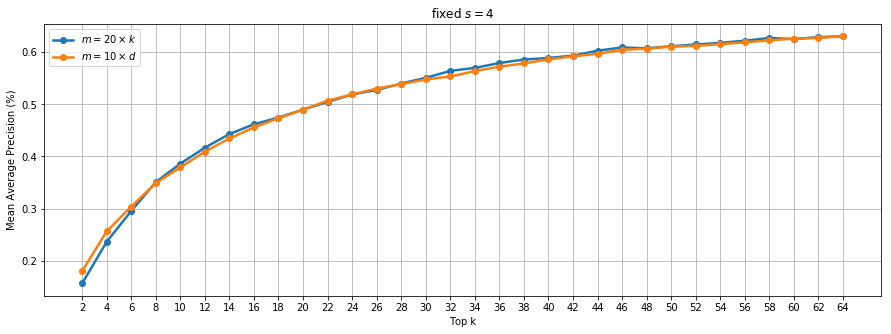

In [80]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m20k, 'o-', linewidth=2.5, label='$m = 20 \\times k$')
plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='$m = 10 \\times d$')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

#### 非中心化

In [81]:
s = 4
m = 10 * d
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

In [82]:
%%time
precision_k_with_s4_no_center = []
for k in k_arr:
    precision_k_with_s4_no_center.append(test_precision(train, test, 
                                        s, m, k, use_wta=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 12min 59s, sys: 4.55 s, total: 13min 3s
Wall time: 13min 9s


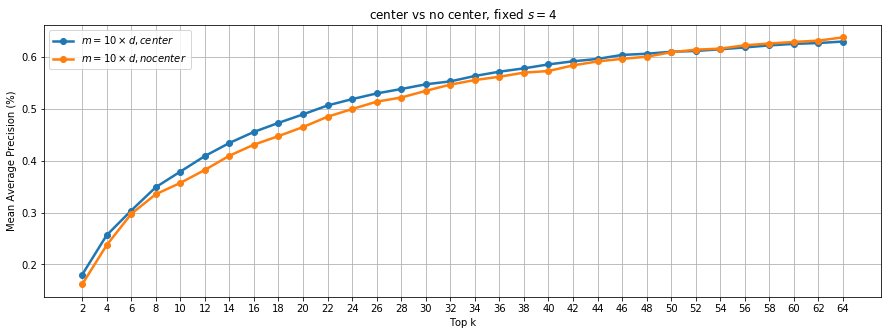

In [83]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='$m = 10 \\times d, center$')
plt.plot(k_arr, precision_k_with_s4_no_center, 'o-', linewidth=2.5, label='$m = 10 \\times d, no center$')
plt.xticks(k_arr)
plt.grid()
plt.title('center vs no center, fixed $s = 4$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

## test: winner-take-all use indices

**when**
$$
z_i = 
\begin{cases}
1, & \text{if $y_i$ is one of the $k$ largest entries in $y$} \\
0, & \text{otherwise}
\end{cases}
$$

#### fixed $s = 4$, $m = 20 \times k$, $k$ from $2$ to $64$

In [84]:
s = 4
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

In [85]:
%%time
precision_k_with_s4_m20k_indices = []
for k in k_arr:
    m = 20 * k
    precision_k_with_s4_m20k_indices.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True, use_indices=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 23min 45s, sys: 1min, total: 24min 45s
Wall time: 14min 49s


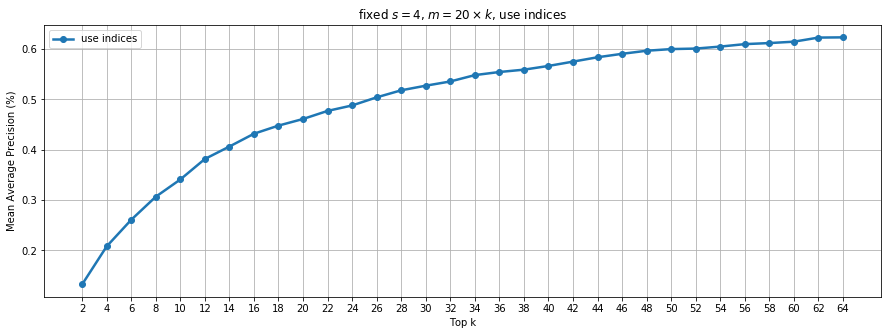

In [86]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m20k_indices, 'o-', linewidth=2.5, label='use indices')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 20 \\times k$, use indices')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

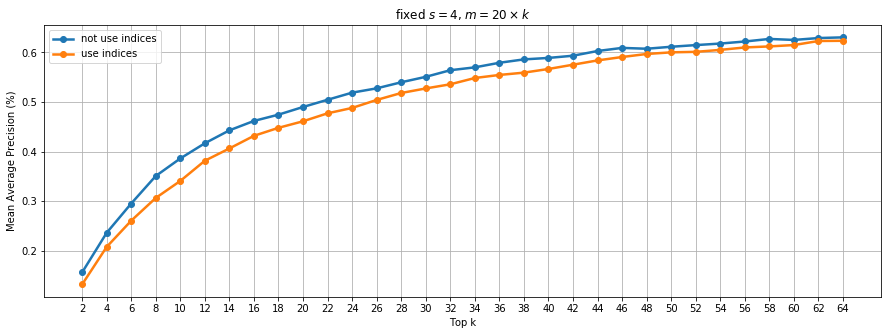

In [87]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m20k, 'o-', linewidth=2.5, label='not use indices')
plt.plot(k_arr, precision_k_with_s4_m20k_indices, 'o-', linewidth=2.5, label='use indices')

plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 20 \\times k$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

#### fixed $s=4$, $m = 10 \times d$, $k$ from $2$ to $64$

**s = [1,64], m = 10 $\times$ d, k = 4**

In [88]:
s = 4
m = 10 * d
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

In [89]:
%%time
precision_k_with_s4_m10d_indices = []
for k in k_arr:
    precision_k_with_s4_m10d_indices.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True, use_indices=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 24min 14s, sys: 58.5 s, total: 25min 13s
Wall time: 14min 43s


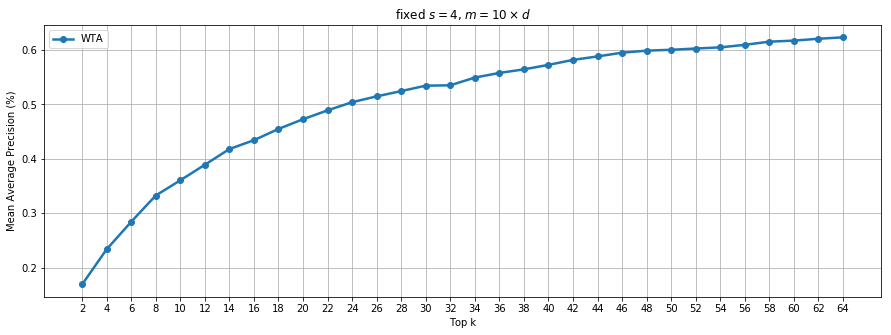

In [90]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'o-', linewidth=2.5, label='WTA')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 10 \\times d$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

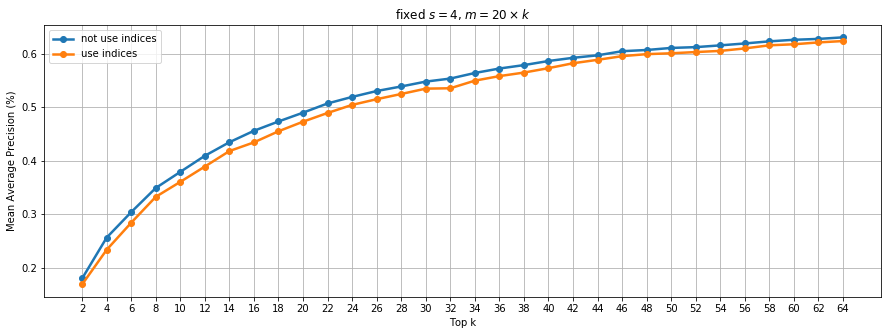

In [91]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='not use indices')
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'o-', linewidth=2.5, label='use indices')

plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 20 \\times k$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

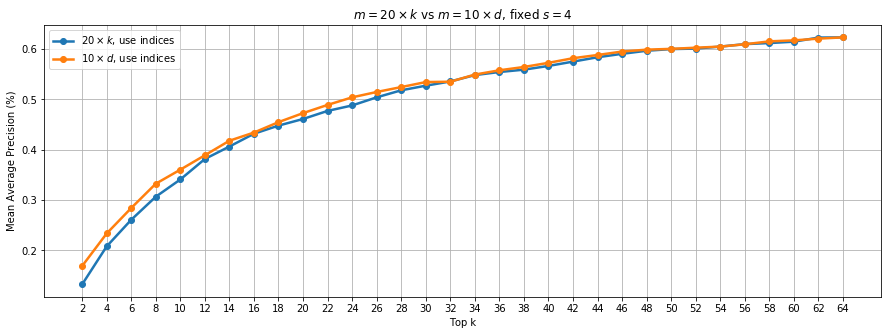

In [92]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m20k_indices, 'o-', linewidth=2.5, label='$20\\times k$, use indices')
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'o-', linewidth=2.5, label='$10\\times d$, use indices')

plt.xticks(k_arr)
plt.grid()
plt.title('$m = 20 \\times k$ vs $m = 10 \\times d$, fixed $s = 4$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

In [93]:
s = 3
m = 10 * d
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

In [94]:
%%time
precision_k_with_s3_m10d = []
for k in k_arr:
    precision_k_with_s3_m10d.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True, use_indices=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 22min 12s, sys: 55.3 s, total: 23min 7s
Wall time: 12min 29s


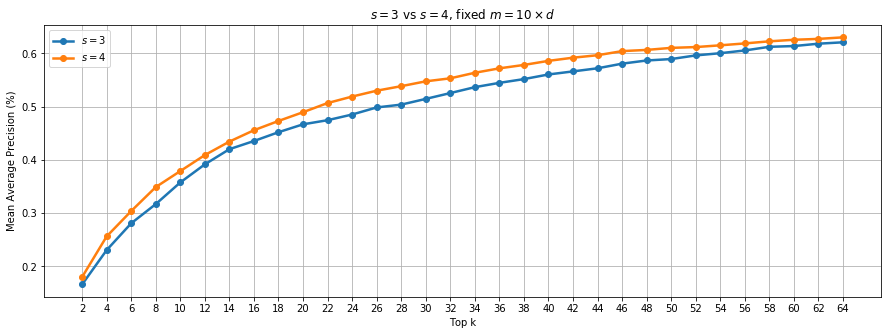

In [95]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s3_m10d, 'o-', linewidth=2.5, label='$s=3$')
plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='$s=4$')
plt.xticks(k_arr)
plt.grid()
plt.title('$s=3$ vs $s=4$, fixed $m = 10 \\times d$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

# Test

## Variance

In [96]:
variance = train_center.var(axis=0)

In [97]:
variance.max(), variance.min(), variance.sum()

(2818.0132539100528, 270.6917937499968, 149581.7668265003)

In [98]:
# 选择每个位置的概率
variance / variance.sum()

array([0.00756017, 0.00319385, 0.0020903 , 0.00200645, 0.00249905,
       0.00306024, 0.00411879, 0.00377389, 0.00895123, 0.00841206,
       0.01247213, 0.00602254, 0.00428718, 0.00959954, 0.0122313 ,
       0.00540315, 0.01134473, 0.00551709, 0.01254837, 0.00834315,
       0.00421808, 0.0060656 , 0.01163495, 0.00961466, 0.00701421,
       0.00313249, 0.00433043, 0.00401759, 0.00341591, 0.00226552,
       0.00203828, 0.00360574, 0.01524193, 0.0054958 , 0.0029598 ,
       0.00453159, 0.00639822, 0.00928533, 0.00873297, 0.00523432,
       0.01801502, 0.01407853, 0.01295492, 0.00520796, 0.00799283,
       0.01592099, 0.01444286, 0.00459863, 0.01871726, 0.00425936,
       0.01603143, 0.01593232, 0.00871396, 0.0050307 , 0.01001375,
       0.01545044, 0.01529312, 0.00414822, 0.00799712, 0.00932215,
       0.00842302, 0.0056094 , 0.00325082, 0.00642894, 0.01496081,
       0.00402429, 0.00862669, 0.00827484, 0.00653557, 0.00516365,
       0.00329738, 0.0060233 , 0.01883928, 0.00409882, 0.01483

In [99]:
n, d = train_center.shape
s = 4
m = 10 * d
k = 64

In [100]:
d, s, m, k

(128, 4, 1280, 64)

In [101]:
idxs = np.array([rand.choice(np.arange(d), p=variance/variance.sum(), size=s, replace=False) for i in range(m)])

In [102]:
idxs

array([[ 64, 104,  22,  89],
       [ 60,  66,  31,  55],
       [ 38,  30,   7, 115],
       ...,
       [104,  27,  79, 113],
       [ 86,  96, 110,  30],
       [110,  58,  86,  45]])

In [103]:
idxs = rand.choice(np.arange(d), p=variance / variance.sum(), size=(m, s))

In [104]:
idxs

array([[ 45, 105,  67,  88],
       [ 71,  43,  55,  66],
       [107,  51,  96,  16],
       ...,
       [ 93,  57,  86,  49],
       [ 52,  72, 120, 112],
       [106, 112,  79,  83]])

In [105]:
M = np.zeros((m, d))

In [106]:
for i in range(m):
    M[i][idxs[i]] = 1

In [107]:
M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
H = train_center.dot(M.T)

In [109]:
m = 10 * d
s_arr

array([ 1,  3,  6,  8, 12, 25, 38, 51, 64])

In [110]:
%%time
precision_s_with_m10d_variance = []
for s in s_arr:
    precision_s_with_m10d_variance.append(test_precision(train_center, test_center, 
                                        s, m, use_variance=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 5min 48s, sys: 14.4 s, total: 6min 3s
Wall time: 3min 2s


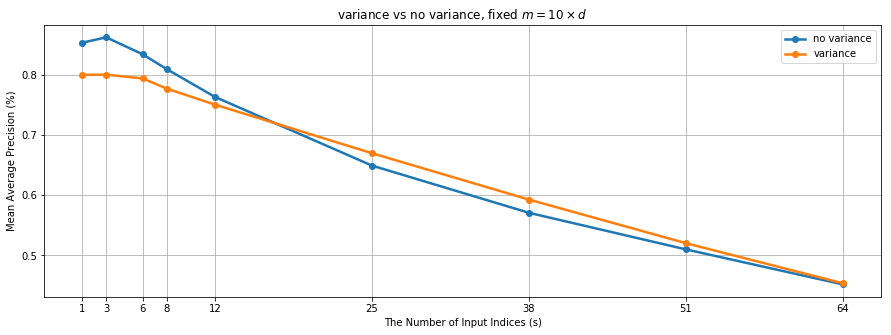

In [111]:
plt.figure(figsize=(15, 5))
plt.plot(s_arr, precision_s_with_m_10d, 'o-', linewidth=2.5, label='no variance')
plt.plot(s_arr, precision_s_with_m10d_variance, 'o-', linewidth=2.5, label='variance')
plt.xticks(s_arr)
plt.grid()
plt.title('variance vs no variance, fixed $m = 10 \\times d$')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

In [112]:
s = 4
m = 10 * d
k_arr

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64])

In [113]:
%%time
precision_k_with_s4_m10d_variance = []
for k in k_arr:
    precision_k_with_s4_m10d_variance.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True, use_variance=True, 
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 21min 31s, sys: 54.8 s, total: 22min 26s
Wall time: 11min 44s


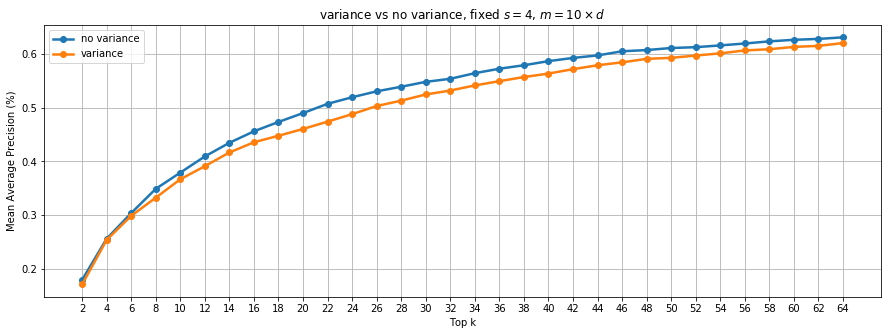

In [114]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='no variance')
plt.plot(k_arr, precision_k_with_s4_m10d_variance, 'o-', linewidth=2.5, label='variance')
plt.xticks(k_arr)
plt.grid()
plt.title('variance vs no variance, fixed $s = 4$, $m = 10 \\times d$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

In [115]:
%%time
m = 10 * d
precision_k_with_s4_m10d_indices_variance = []
for k in k_arr:
    precision_k_with_s4_m10d_indices_variance.append(test_precision(train_center, test_center, 
                                        s, m, k, use_wta=True, use_indices=True, use_variance=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 24min 34s, sys: 59.3 s, total: 25min 33s
Wall time: 15min


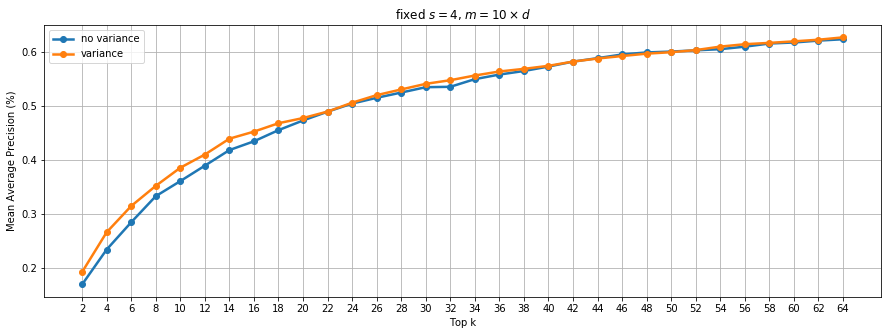

In [116]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'o-', linewidth=2.5, label='no variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance, 'o-', linewidth=2.5, label='variance')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 10 \\times d$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

**s = [1,64], m = 10 $\times$ d, k = 4**

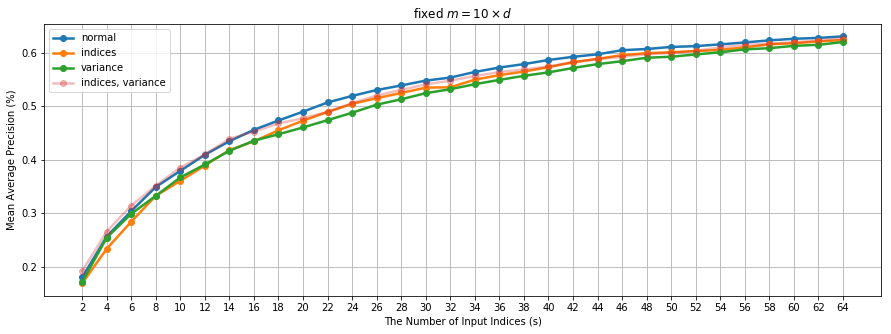

In [117]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='normal')
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'o-', linewidth=2.5, label='indices')
plt.plot(k_arr, precision_k_with_s4_m10d_variance, 'o-', linewidth=2.5, label='variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance, 'o-', linewidth=2.5, label='indices, variance', alpha=0.3)
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $m = 10 \\times d$')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

In [118]:
a = np.array([
    [1, 2, 3, 4],
    [1, 3, 5, 4]
])
a.var(axis=0)

array([0.  , 0.25, 1.  , 0.  ])

In [119]:
train_center.var(axis=0)

array([1130.86299696,  477.74148975,  312.67061111,  300.12763975,
        373.81296604,  457.7566    ,  616.09598311,  564.50459136,
       1338.94052784, 1258.29100975, 1865.60393596,  900.86291719,
        641.28467191, 1435.91588279, 1829.57899991,  808.213224  ,
       1696.96454639,  825.25562351, 1877.00687975, 1247.98251775,
        630.94823839,  907.30315996, 1740.37705136, 1438.17779804,
       1049.19730119,  468.56392439,  647.75324284,  600.95805159,
        510.958444  ,  338.88046775,  304.88930871,  539.35269319,
       2279.91554639,  822.07220479,  442.73200319,  677.84347964,
        957.05696871, 1388.91579516, 1306.29320479,  782.95825984,
       2694.71829216, 2105.89071216, 1937.81932704,  779.01542684,
       1195.58094496, 2381.49028816, 2160.38880444,  687.87175151,
       2799.76150556,  637.12238896, 2398.00981311, 2383.18456336,
       1303.44919975,  752.50165479, 1497.875159  , 2311.104175  ,
       2287.57228111,  620.49872359, 1196.22272839, 1394.42387

In [120]:
train_center_std = train_center / train.std(axis=0)
test_center_std = test_center / train.std(axis=0)

In [121]:
%%time
s = 4
m = 10 * d
precision_k_with_s4_m10d_std = []
for k in k_arr:
    precision_k_with_s4_m10d_std.append(test_precision(train_center_std, test_center_std, 
                                        s, m, k, use_wta=True, 
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 25min 18s, sys: 1min 1s, total: 26min 19s
Wall time: 15min 57s


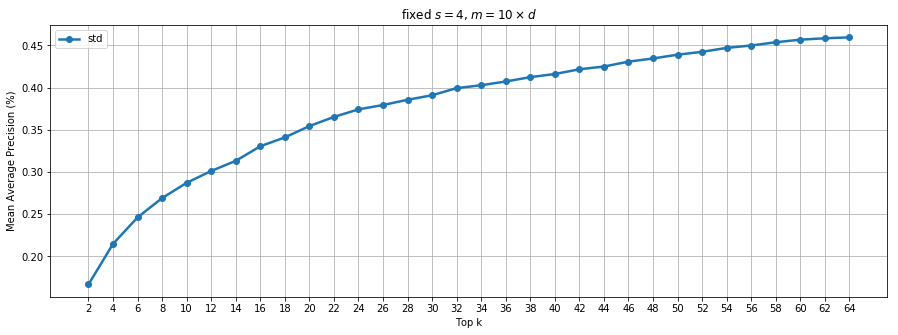

In [122]:
plt.figure(figsize=(15, 5))
# plt.plot(k_arr, precision_k_with_s4_m10d, 'o-', linewidth=2.5, label='no std')
plt.plot(k_arr, precision_k_with_s4_m10d_std, 'o-', linewidth=2.5, label='std')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 10 \\times d$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

In [123]:
%%time
s = 4
m = 10 * d
precision_k_with_s4_m10d_indices_std = []
for k in k_arr:
    precision_k_with_s4_m10d_indices_std.append(test_precision(train_center_std, test_center_std, 
                                        s, m, k, use_wta=True, use_indices=True,
                                        near_neighbors=k_near_neighbors, random_state=1))

CPU times: user 28min 1s, sys: 1min 4s, total: 29min 6s
Wall time: 19min 2s


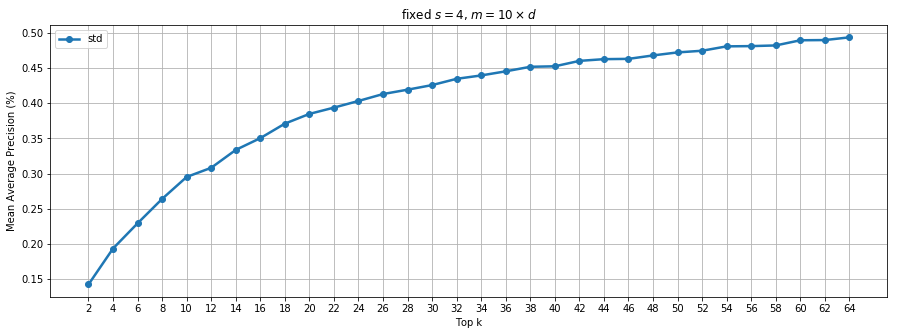

In [124]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d_indices_std, 'o-', linewidth=2.5, label='std')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $s = 4$, $m = 10 \\times d$')
plt.xlabel('Top k')
plt.ylabel('Mean Average Precision (%)')
plt.legend()
plt.show()

## Abs

In [125]:
%store -r precision_k_with_s4_m10d_wta_abs

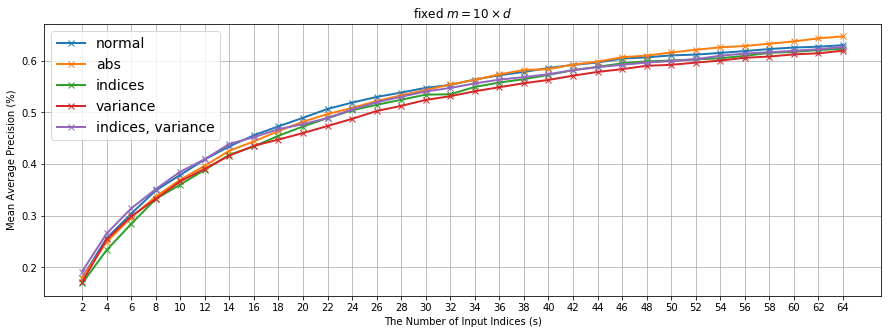

In [126]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'x-', linewidth=2, label='normal')
plt.plot(k_arr, precision_k_with_s4_m10d_wta_abs, 'x-', linewidth=2, label='abs')
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'x-', linewidth=2, label='indices')
plt.plot(k_arr, precision_k_with_s4_m10d_variance, 'x-', linewidth=2, label='variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance, 'x-', linewidth=2, label='indices, variance')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $m = 10 \\times d$')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend(fontsize=14)
plt.show()

In [127]:
%store -r precision_k_with_s4_m10d_indices_abs
%store -r precision_k_with_s4_m10d_indices_variance_abs

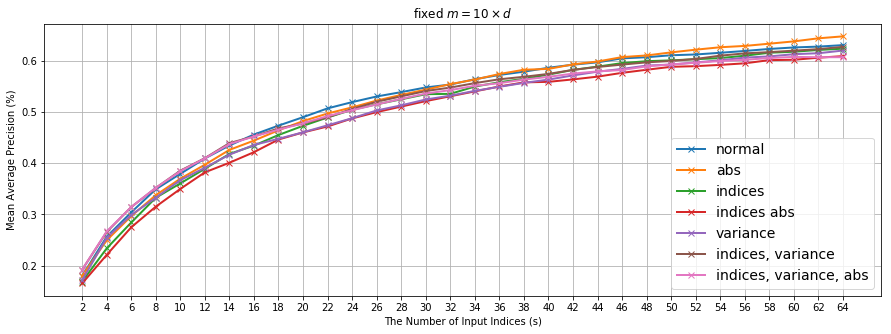

In [128]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'x-', linewidth=2, label='normal')
plt.plot(k_arr, precision_k_with_s4_m10d_wta_abs, 'x-', linewidth=2, label='abs')
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'x-', linewidth=2, label='indices')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_abs, 'x-', linewidth=2, label='indices abs')
plt.plot(k_arr, precision_k_with_s4_m10d_variance, 'x-', linewidth=2, label='variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance, 'x-', linewidth=2, label='indices, variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance_abs, 'x-', linewidth=2, label='indices, variance, abs')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $m = 10 \\times d$')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend(fontsize=14)
plt.show()

In [129]:
%store -r precision_k_with_s1_m10d_wta_abs

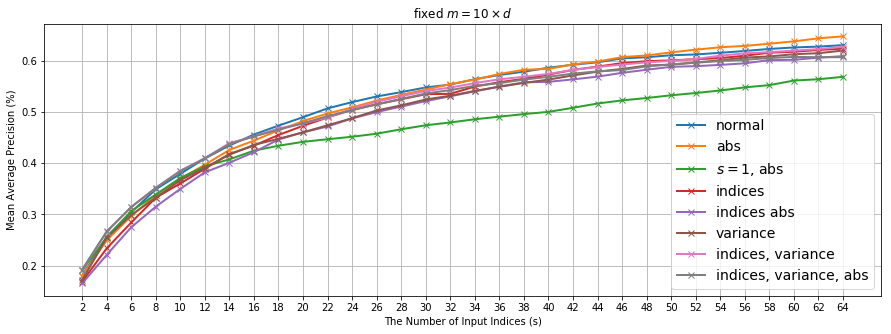

In [130]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'x-', linewidth=2, label='normal')
plt.plot(k_arr, precision_k_with_s4_m10d_wta_abs, 'x-', linewidth=2, label='abs')
plt.plot(k_arr, precision_k_with_s1_m10d_wta_abs, 'x-', linewidth=2, label='$s=1$, abs')
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'x-', linewidth=2, label='indices')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_abs, 'x-', linewidth=2, label='indices abs')
plt.plot(k_arr, precision_k_with_s4_m10d_variance, 'x-', linewidth=2, label='variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance, 'x-', linewidth=2, label='indices, variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance_abs, 'x-', linewidth=2, label='indices, variance, abs')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $m = 10 \\times d$')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend(fontsize=14)
plt.show()

## Wrong Method

In [131]:
def sigmoid(inX):
    return 1 / (1 + np.exp(-inX))

def PNs_to_Kenyon(train, test, m, sampling_num):
    weights = np.zeros(shape=(train.shape[1], m))
    for i in range(train.shape[1]):
        index = np.random.randint(0, m, sampling_num)
        weights[i][index] = 1
    train_Kenyon_vectors = train@weights
    test_Kenyon_vectors = test@weights
    return train_Kenyon_vectors, test_Kenyon_vectors

def generate_tag(Kenyon_vectors, k):
    threshold = np.sort(Kenyon_vectors,axis=1)[:,-k][:, None]
    win = (Kenyon_vectors>=threshold).astype(np.int)
    tags = Kenyon_vectors * win
    return tags

def query_procedure(train_tags, test_tags, neighbor_num):
    query_neighbors = np.zeros(dtype=np.int, shape=(test_tags.shape[0], neighbor_num))
    for i in range(test_tags.shape[0]):
        query_neighbors[i] = np.sqrt(np.sum((train_tags - test_tags[i]) ** 2, axis=1)).argsort()[:neighbor_num]
    return query_neighbors

def generate_precision_wx(train, test, s, k, m, K, near_neighbors):
    train_Kenyon_vectors, test_Kenyon_vectors = PNs_to_Kenyon(train, test, m, s)
    
    train_tags = generate_tag(train_Kenyon_vectors, k)
    test_tags = generate_tag(test_Kenyon_vectors, k)
    
    query_neighbors = query_procedure(train_tags, test_tags, K)
    
    precisions = np.zeros(test.shape[0])
    
    for i in range(test.shape[0]):
        precisions[i] = len(np.intersect1d(query_neighbors[i], near_neighbors[i])) / 200

    return np.sum(precisions) / len(precisions)

neighbor_num = 200

# m = 10*d
s = 1
m = 10 * d
precisions_k_with_s1_m10d_wrong_method = []
for k in k_arr:
    precisions_k_with_s1_m10d_wrong_method.append(generate_precision_wx(train_center, test_center, s, k, m, neighbor_num, k_near_neighbors))

In [132]:
def test_precision_wx(train, test, s, m, k=4, near_neighbors=None, K=200, 
                   use_wta=False, use_indices=False, use_variance=False,
                   random_state=None, verbose=False):
    """
    Args:
        s: number of select ...  10%
        m: number of Kenyon Cells  20*k, 10*d
        k: Top k (winner take all)
        near_neighbors
        K: k near neighbors
        use_wta: winner take all
        use_indices: top k = 1, else = 0
        use_variance
        random_state
        verbose
    """
    if random_state is None:
        rand = np.random.RandomState()
    else:
        rand = np.random.RandomState(random_state)

    
    n, d = train.shape
    
    weights = np.zeros((d, m))
    for i in range(d):
        idx = rand.randint(0, m, s)
        weights[i][idx] = 1
    
    H = train.dot(weights)

    if use_wta is True:
        H_order = H.argsort(axis=1)
        for i, h in enumerate(H_order[:, :-k]):
            H[i][h] = 0
            if use_indices is True:
                H[i][H[i] != 0] = 1
    
    precision = []
    for i, q in enumerate(test):
        h = q.dot(weights)
        
        if use_wta is True:
            h[h.argsort()[:-k]] = 0
        
            if use_indices is True:
                h[h != 0] = 1

        dis = np.array([distance.euclidean(h, h_) for h_ in H])
        
        precision.append(len(np.intersect1d(dis.argsort()[:K], near_neighbors[i])) / K)
    
    result = np.array(precision).mean()

    if verbose is True:
        print('s = {}, m = {}, k = {}, preicison = {}'.format(s, m, k, result))
        
    return result

In [133]:
%%time
# m = 10*d
s = 1
K = 200
m = 10 * d
precision_k_with_s1_m10d_wta_wrong_method = []
for k in k_arr:
    precision_k_with_s1_m10d_wta_wrong_method.append(test_precision_wx(train_center, test_center, 
                                                                       s, m, k, 
                                                                       k_near_neighbors, K, 
                                                                       use_wta=True,
                                                                       random_state=1))

CPU times: user 24min 26s, sys: 59.4 s, total: 25min 25s
Wall time: 14min 56s


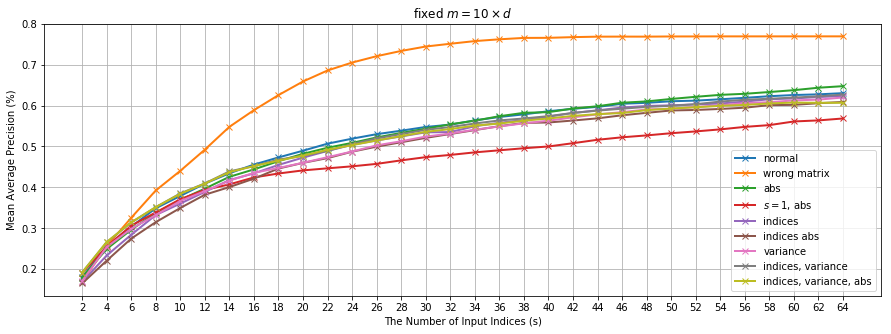

In [134]:
plt.figure(figsize=(15, 5))
plt.plot(k_arr, precision_k_with_s4_m10d, 'x-', linewidth=2, label='normal')
plt.plot(k_arr, precision_k_with_s1_m10d_wta_wrong_method, 'x-', linewidth=2, label='wrong matrix')
plt.plot(k_arr, precision_k_with_s4_m10d_wta_abs, 'x-', linewidth=2, label='abs')
plt.plot(k_arr, precision_k_with_s1_m10d_wta_abs, 'x-', linewidth=2, label='$s=1$, abs')
plt.plot(k_arr, precision_k_with_s4_m10d_indices, 'x-', linewidth=2, label='indices')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_abs, 'x-', linewidth=2, label='indices abs')
plt.plot(k_arr, precision_k_with_s4_m10d_variance, 'x-', linewidth=2, label='variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance, 'x-', linewidth=2, label='indices, variance')
plt.plot(k_arr, precision_k_with_s4_m10d_indices_variance_abs, 'x-', linewidth=2, label='indices, variance, abs')
plt.xticks(k_arr)
plt.grid()
plt.title('fixed $m = 10 \\times d$')
plt.xlabel('The Number of Input Indices (s)')
plt.ylabel('Mean Average Precision (%)')
plt.legend(fontsize=10)
plt.show()

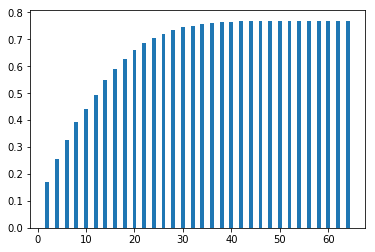

In [135]:
plt.bar(k_arr, precision_k_with_s1_m10d_wta_wrong_method)
plt.show()

In [136]:
K = 200
k = 64

In [137]:
%%time
precision_k_with_original_method = []
for k in k_arr:
    H = train_center.copy()
    H_order = H.argsort(axis=1)
    for i, h in enumerate(H_order[:, :-k]):
        H[i][h] = 0
    precision = []
    for i, q in enumerate(test_center):
        h = q.copy()

        h[h.argsort()[:-k]] = 0

        dis = np.array([distance.euclidean(h, h_) for h_ in H])

        precision.append(len(np.intersect1d(dis.argsort()[:K], k_near_neighbors[i])) / K)
        
    precision_k_with_original_method.append(np.array(precision).mean())

CPU times: user 11min 3s, sys: 768 ms, total: 11min 4s
Wall time: 11min 2s


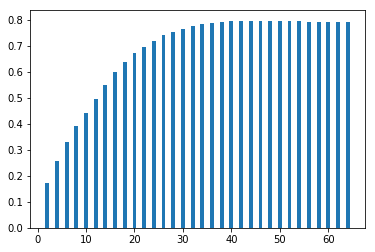

In [138]:
plt.bar(k_arr, precision_k_with_original_method)
plt.show()

---

**What???**

# Data dependent